In [14]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sb 
  
from sklearn.model_selection import train_test_split 
from sklearn.preprocessing import StandardScaler 
from sklearn.linear_model import LogisticRegression 
from sklearn.svm import SVC 
from xgboost import XGBClassifier 
from sklearn import metrics 
  
import warnings 
warnings.filterwarnings('ignore')

In [108]:
import yfinance as yf
stock = yf.Ticker('NVDA')

recommendations = stock.recommendations

recommendations

,period,strongBuy,buy,hold,sell,strongSell
0,0m,7,14,15,1,1
1,-1m,20,34,4,0,0
2,-2m,19,33,4,0,0
3,-3m,12,21,12,2,0


In [109]:
# get historical market data
df = stock.history(period="5y").reset_index()
df['Adj Close'] = df['Close']
df

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits,Adj Close
0,2019-05-28 00:00:00-04:00,36.217346,36.545103,35.569277,35.589142,42835600,0.00,0.0,35.589142
1,2019-05-29 00:00:00-04:00,35.112399,35.462506,34.499093,34.846714,55980000,0.00,0.0,34.846714
2,2019-05-30 00:00:00-04:00,34.879028,35.236992,34.197907,34.580727,39430000,0.04,0.0,34.580727
3,2019-05-31 00:00:00-04:00,34.091023,34.764691,33.655998,33.673401,38972000,0.00,0.0,33.673401
4,2019-06-03 00:00:00-04:00,33.785260,34.173053,32.962443,33.255772,47864400,0.00,0.0,33.255772
...,...,...,...,...,...,...,...,...,...
1254,2024-05-20 00:00:00-04:00,937.500000,952.000000,934.400024,947.799988,31876400,0.00,0.0,947.799988
1255,2024-05-21 00:00:00-04:00,935.989990,954.000000,931.799988,953.859985,32894600,0.00,0.0,953.859985
1256,2024-05-22 00:00:00-04:00,954.590027,960.200012,932.489990,949.500000,54864800,0.00,0.0,949.500000
1257,2024-05-23 00:00:00-04:00,1020.280029,1063.199951,1015.200012,1037.989990,83506500,0.00,0.0,1037.989990


In [110]:
df.describe()

,Open,High,Low,Close,Volume,Dividends,Stock Splits,Adj Close
count,1259.000000,1259.000000,1259.000000,1259.000000,1.259000e+03,1259.000000,1259.000000,1259.000000
mean,237.007457,241.395700,232.486860,237.205533,4.551762e+07,0.000635,0.003177,237.205533
std,205.237427,208.826196,201.329938,205.343807,1.846054e+07,0.005003,0.112732,205.343807
min,33.785260,34.173053,32.962443,33.255772,9.788400e+06,0.000000,0.000000,33.255772
25%,118.435780,121.971920,115.241780,118.806366,3.235410e+07,0.000000,0.000000,118.806366
50%,168.557294,171.885668,164.608133,169.167587,4.277960e+07,0.000000,0.000000,169.167587
75%,278.240764,283.895101,272.675222,278.575638,5.515060e+07,0.000000,0.000000,278.575638
max,1044.489990,1064.750000,1030.000000,1064.689941,1.543911e+08,0.040000,4.000000,1064.689941


In [111]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1259 entries, 0 to 1258
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype                           
---  ------        --------------  -----                           
 0   Date          1259 non-null   datetime64[ns, America/New_York]
 1   Open          1259 non-null   float64                         
 2   High          1259 non-null   float64                         
 3   Low           1259 non-null   float64                         
 4   Close         1259 non-null   float64                         
 5   Volume        1259 non-null   int64                           
 6   Dividends     1259 non-null   float64                         
 7   Stock Splits  1259 non-null   float64                         
 8   Adj Close     1259 non-null   float64                         
dtypes: datetime64[ns, America/New_York](1), float64(7), int64(1)
memory usage: 88.6 KB


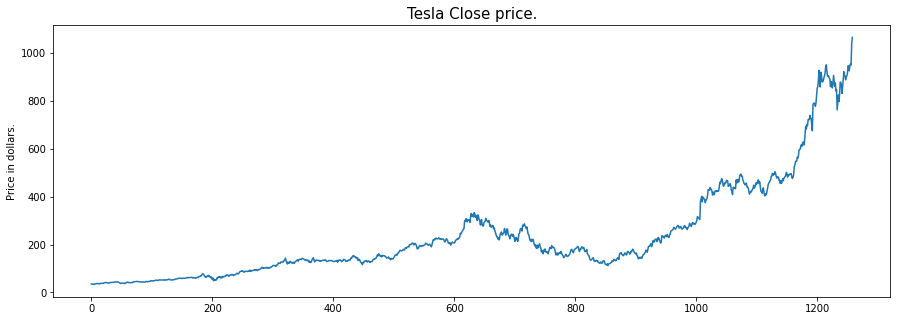

In [112]:
plt.figure(figsize=(15,5)) 
plt.plot(df['Close']) 
plt.title('Tesla Close price.', fontsize=15) 
plt.ylabel('Price in dollars.') 
plt.show()

In [113]:
df[df['Close'] == df['Adj Close']].shape

(1259, 9)

In [114]:

df = df.drop(['Adj Close'], axis=1)

In [115]:
df.isnull().sum()

Date            0
Open            0
High            0
Low             0
Close           0
Volume          0
Dividends       0
Stock Splits    0
dtype: int64

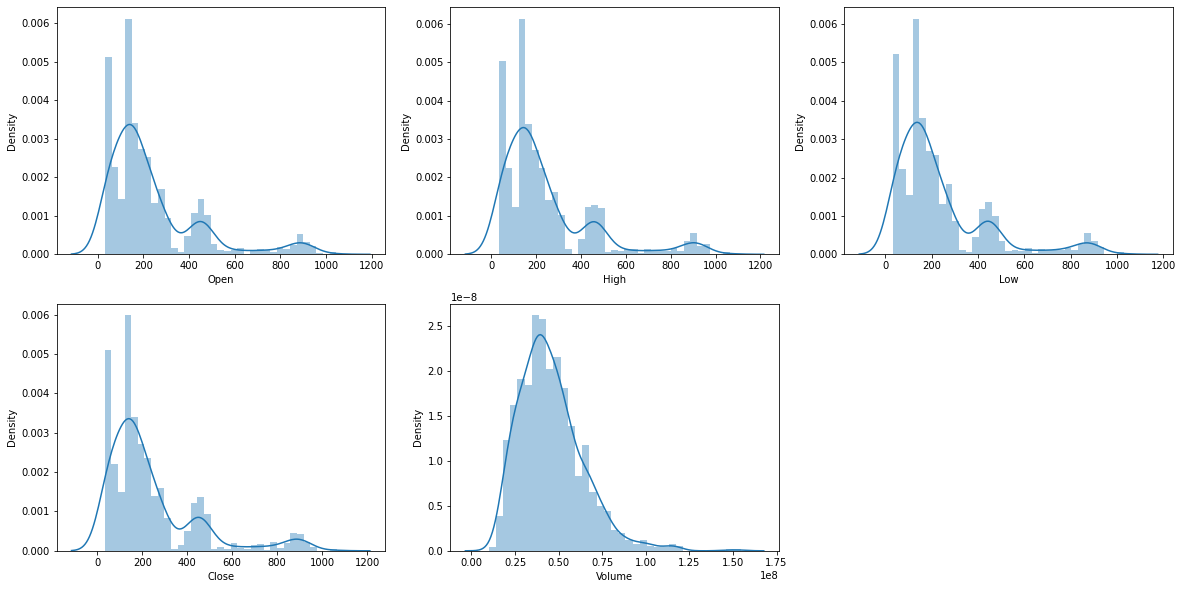

In [116]:
features = ['Open', 'High', 'Low', 'Close', 'Volume'] 
  
plt.subplots(figsize=(20,10)) 
  
for i, col in enumerate(features): 
  plt.subplot(2,3,i+1) 
  sb.distplot(df[col]) 
plt.show()

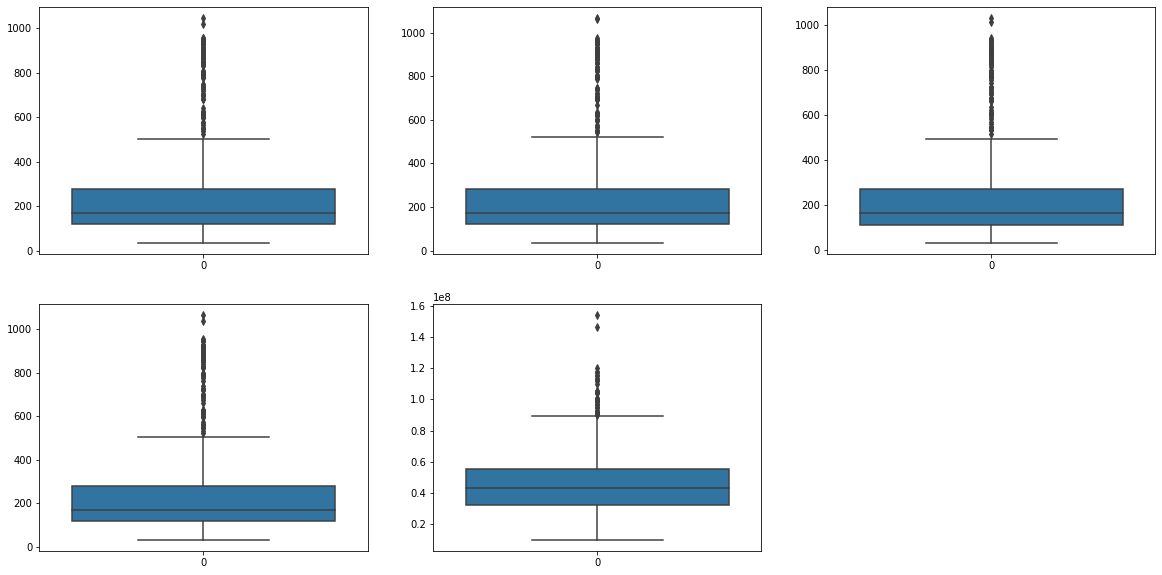

In [117]:
plt.subplots(figsize=(20,10)) 
for i, col in enumerate(features): 
  plt.subplot(2,3,i+1) 
  sb.boxplot(df[col]) 
plt.show()

In [118]:
df['Date'] = df['Date'].astype(str)
splitted = df['Date'].str.split(' ', expand=True) 
  
df['p1'] = splitted[0].astype('str') 

splitted2 = df['p1'].str.split('-', expand=True) 

df['day'] = splitted2[2].astype('int') 
df['month'] = splitted2[1].astype('int') 
df['year'] = splitted2[0].astype('int') 
  
df.head()

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits,p1,day,month,year
0,2019-05-28 00:00:00-04:00,36.217346,36.545103,35.569277,35.589142,42835600,0.00,0.0,2019-05-28,28,5,2019
1,2019-05-29 00:00:00-04:00,35.112399,35.462506,34.499093,34.846714,55980000,0.00,0.0,2019-05-29,29,5,2019
2,2019-05-30 00:00:00-04:00,34.879028,35.236992,34.197907,34.580727,39430000,0.04,0.0,2019-05-30,30,5,2019
3,2019-05-31 00:00:00-04:00,34.091023,34.764691,33.655998,33.673401,38972000,0.00,0.0,2019-05-31,31,5,2019
4,2019-06-03 00:00:00-04:00,33.785260,34.173053,32.962443,33.255772,47864400,0.00,0.0,2019-06-03,3,6,2019


In [119]:
df['is_quarter_end'] = np.where(df['month']%3==0,1,0) 
df.head()


,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits,p1,day,month,year,is_quarter_end
0,2019-05-28 00:00:00-04:00,36.217346,36.545103,35.569277,35.589142,42835600,0.00,0.0,2019-05-28,28,5,2019,0
1,2019-05-29 00:00:00-04:00,35.112399,35.462506,34.499093,34.846714,55980000,0.00,0.0,2019-05-29,29,5,2019,0
2,2019-05-30 00:00:00-04:00,34.879028,35.236992,34.197907,34.580727,39430000,0.04,0.0,2019-05-30,30,5,2019,0
3,2019-05-31 00:00:00-04:00,34.091023,34.764691,33.655998,33.673401,38972000,0.00,0.0,2019-05-31,31,5,2019,0
4,2019-06-03 00:00:00-04:00,33.785260,34.173053,32.962443,33.255772,47864400,0.00,0.0,2019-06-03,3,6,2019,1


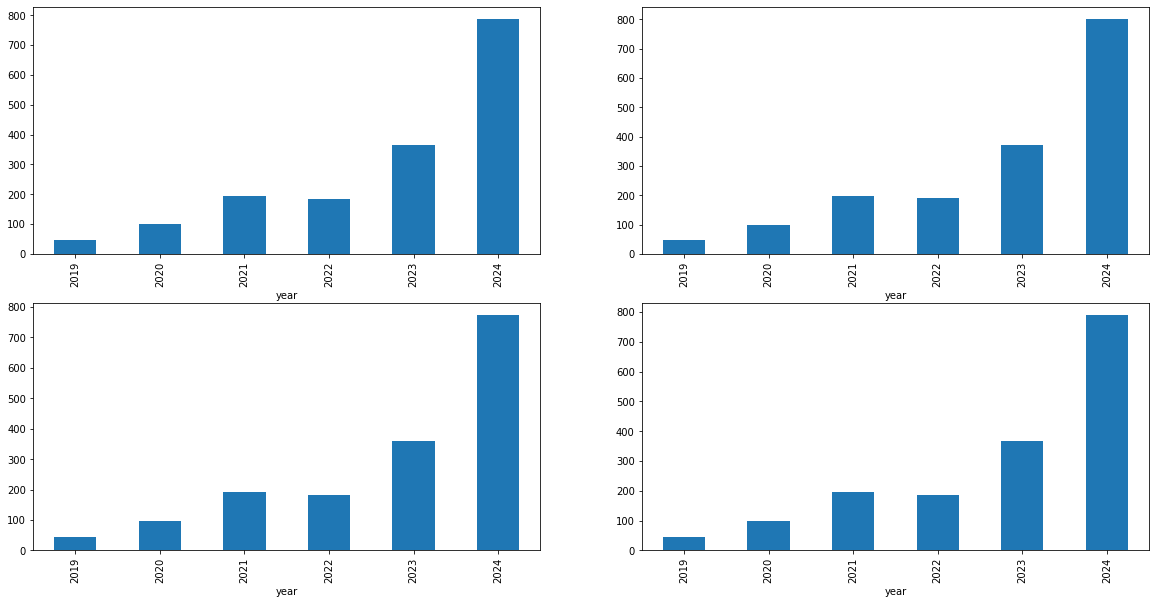

In [120]:
data_grouped = df.groupby('year').mean() 
plt.subplots(figsize=(20,10)) 

for i, col in enumerate(['Open', 'High', 'Low', 'Close']): 
    plt.subplot(2,2,i+1) 
    data_grouped[col].plot.bar() 
plt.show()


In [121]:

df.groupby('is_quarter_end').mean()

,Open,High,Low,Close,Volume,Dividends,Stock Splits,day,month,year
is_quarter_end,,,,,,,,,,
0,242.935824,247.495964,238.362964,243.242936,4.529545e+07,0.000288,0.004802,15.711885,6.093637,2021.470588
1,225.415136,229.467248,220.996732,225.399999,4.595206e+07,0.001315,0.000000,15.746479,7.436620,2021.246479


In [122]:
df['open-close']  = df['Open'] - df['Close'] 
df['low-high']  = df['Low'] - df['High'] 
df['target'] = np.where(df['Close'].shift(-1) > df['Close'], 1, 0)
df

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits,p1,day,month,year,is_quarter_end,open-close,low-high,target
0,2019-05-28 00:00:00-04:00,36.217346,36.545103,35.569277,35.589142,42835600,0.00,0.0,2019-05-28,28,5,2019,0,0.628204,-0.975825,0
1,2019-05-29 00:00:00-04:00,35.112399,35.462506,34.499093,34.846714,55980000,0.00,0.0,2019-05-29,29,5,2019,0,0.265685,-0.963413,0
2,2019-05-30 00:00:00-04:00,34.879028,35.236992,34.197907,34.580727,39430000,0.04,0.0,2019-05-30,30,5,2019,0,0.298302,-1.039085,0
3,2019-05-31 00:00:00-04:00,34.091023,34.764691,33.655998,33.673401,38972000,0.00,0.0,2019-05-31,31,5,2019,0,0.417622,-1.108693,0
4,2019-06-03 00:00:00-04:00,33.785260,34.173053,32.962443,33.255772,47864400,0.00,0.0,2019-06-03,3,6,2019,1,0.529488,-1.210610,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1254,2024-05-20 00:00:00-04:00,937.500000,952.000000,934.400024,947.799988,31876400,0.00,0.0,2024-05-20,20,5,2024,0,-10.299988,-17.599976,1
1255,2024-05-21 00:00:00-04:00,935.989990,954.000000,931.799988,953.859985,32894600,0.00,0.0,2024-05-21,21,5,2024,0,-17.869995,-22.200012,0
1256,2024-05-22 00:00:00-04:00,954.590027,960.200012,932.489990,949.500000,54864800,0.00,0.0,2024-05-22,22,5,2024,0,5.090027,-27.710022,1
1257,2024-05-23 00:00:00-04:00,1020.280029,1063.199951,1015.200012,1037.989990,83506500,0.00,0.0,2024-05-23,23,5,2024,0,-17.709961,-47.999939,1


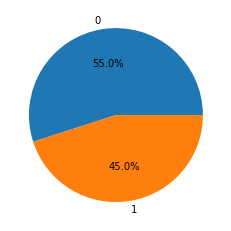

In [123]:
plt.pie(df['target'].value_counts().values,  
        labels=[0, 1], autopct='%1.1f%%') 
plt.show()

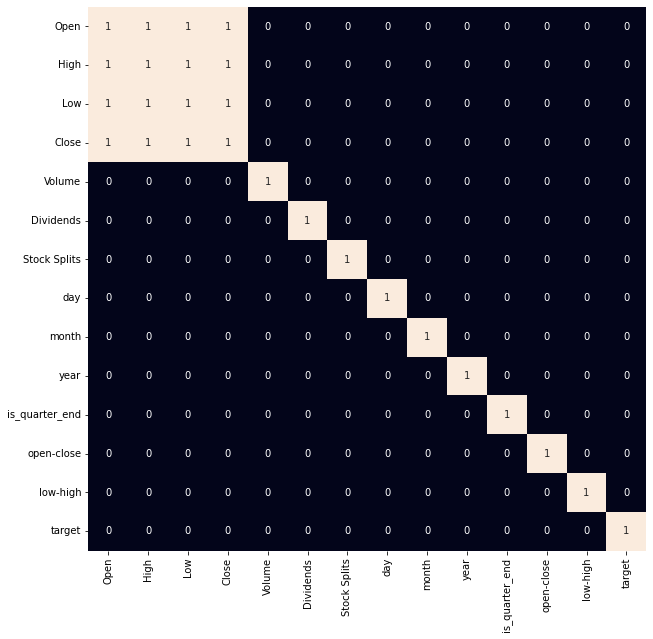

In [124]:
plt.figure(figsize=(10, 10)) 
  
# As our concern is with the highly 
# correlated features only so, we will visualize 
# our heatmap as per that criteria only. 
sb.heatmap(df.corr() > 0.9, annot=True, cbar=False) 
plt.show() 

In [125]:
features = df[['open-close', 'low-high', 'is_quarter_end']] 
target = df['target'] 
  
scaler = StandardScaler() 
features = scaler.fit_transform(features) 
  
X_train, X_valid, Y_train, Y_valid = train_test_split( 
    features, target, test_size=0.2, random_state=2022) 
print(X_train.shape, X_valid.shape) 

(1007, 3) (252, 3)


In [126]:
models = [LogisticRegression(), SVC( 
  kernel='poly', probability=True), XGBClassifier()] 
  
for i in range(3): 
  models[i].fit(X_train, Y_train) 
  
  print(f'{models[i]} : ') 
  print('Training Accuracy : ', metrics.roc_auc_score( 
    Y_train, models[i].predict_proba(X_train)[:,1])) 
  print('Validation Accuracy : ', metrics.roc_auc_score( 
    Y_valid, models[i].predict_proba(X_valid)[:,1])) 
  print()

LogisticRegression() : 
Training Accuracy :  0.5238267838223227
Validation Accuracy :  0.4710638568790985

SVC(kernel='poly', probability=True) : 
Training Accuracy :  0.45047836789318974
Validation Accuracy :  0.5106640351435666

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, ...) : 
Training Accuracy :  0.9911296811146251
Validation Accuracy :  0.48